In [3]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_audio_path(audio_dir, track_id):
    """
    Return the path to the mp3 given the directory where the audio is stored
    and the track ID.
    Examples
    --------
    >>> import utils
    >>> AUDIO_DIR = os.environ.get('AUDIO_DIR')
    >>> utils.get_audio_path(AUDIO_DIR, 2)
    '../data/fma_small/000/000002.mp3'
    """
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')


def get_tids_from_directory(audio_dir):
    """Get track IDs from the mp3s in a directory.
    Parameters
    ----------
    audio_dir : str
        Path to the directory where the audio files are stored.
    Returns
    -------
        A list of track IDs.
    """
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files)
    return tids

In [5]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('audio_files/fma_small')

In [8]:
AUDIO_DIR = 'audio_files/fma_small'
tids = get_tids_from_directory(AUDIO_DIR)
# print(tids)

In [9]:
print(get_audio_path(AUDIO_DIR, 36096))

audio_files/fma_small/036/036096.mp3


### Plot single spectogram

661824 22050
(128, 1293) 036096


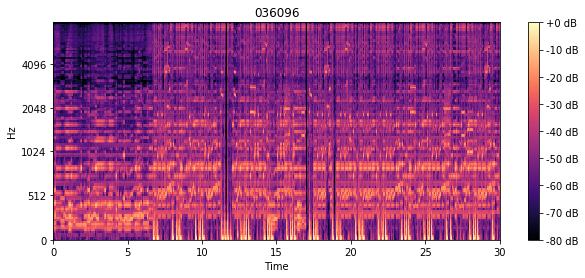

In [11]:
filename = get_audio_path(AUDIO_DIR, 36096)
y, sr = librosa.load(filename)
print(len(y),sr)
each_file = filename.split('/')[-1]
genre_name = each_file.split('.')[0]
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=np.max)
# spect = np.log(spect)
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

In [12]:
filepath = 'audio_files/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top')]

df_all = tracks[keep_cols]
df_all = df_all[df_all[('set', 'subset')] == 'small']

df_all['track_id'] = df_all.index
df_all.head()

set            track track_id
             split subset genre_top         
track_id                                    
2         training  small   Hip-Hop        2
5         training  small   Hip-Hop        5
10        training  small       Pop       10
140       training  small      Folk      140
141       training  small      Folk      141

In [34]:
df_all.head(10)

set                track track_id
               split subset     genre_top         
track_id                                          
2           training  small       Hip-Hop        2
5           training  small       Hip-Hop        5
10          training  small           Pop       10
140         training  small          Folk      140
141         training  small          Folk      141
148       validation  small  Experimental      148
182             test  small          Rock      182
190         training  small          Folk      190
193         training  small          Folk      193
194         training  small          Folk      194

In [63]:
isElectronic = df_all[('track', 'genre_top')] == 'Electronic'
isRock = df_all[('track', 'genre_top')] == 'Rock'
isInstrumental = df_all[('track', 'genre_top')] == 'Instrumental'
isFolk = df_all[('track', 'genre_top')] == 'Folk'
filtered_df = df_all[isElectronic | isRock | isInstrumental | isFolk]
grouped_df = filtered_df.groupby(('track', 'genre_top')).first().reset_index()
grouped_df.head(10)

track       set        track_id
      genre_top     split subset         
0    Electronic  training  small     1482
1          Folk  training  small      140
2  Instrumental      test  small    10250
3          Rock      test  small      182

### Plot Spectogram for all genres

In [64]:
def create_spectogram(track_id, genre):
    filename = get_audio_path(AUDIO_DIR, track_id)
    y, sr = librosa.load(filename)
    print(len(y),sr)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)
#     spect = np.log(spect)
    print(spect.shape, genre)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(str(genre))
    plt.show()

661248 22050
(128, 646) Electronic


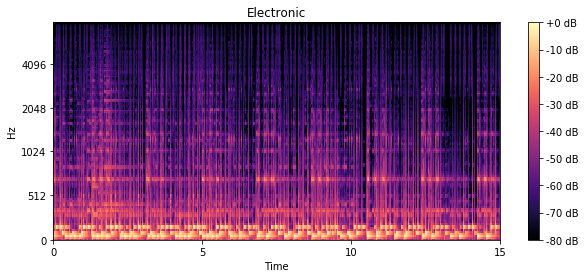

661248 22050
(128, 646) Folk


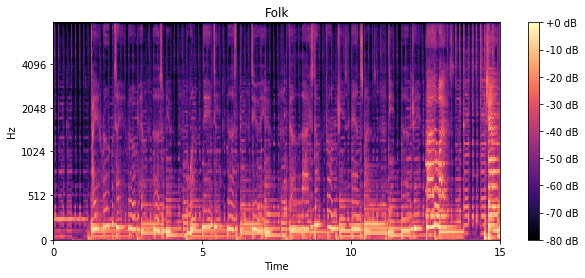

661248 22050
(128, 646) Instrumental


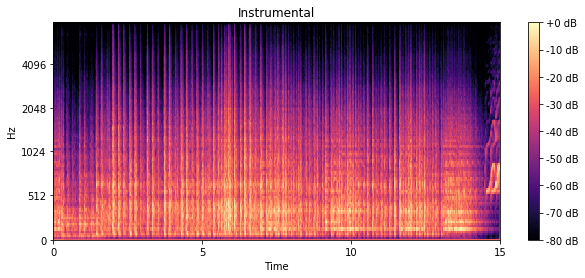

661824 22050
(128, 647) Rock


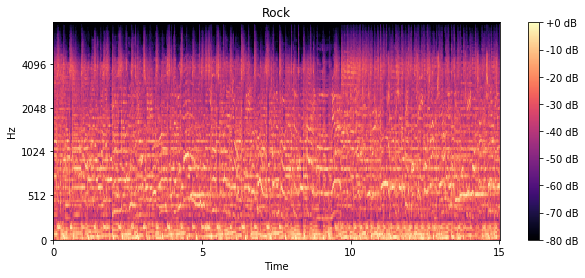

In [65]:
for index, row in grouped_df.iterrows():
    track_id = int(row['track_id'])
    genre = row[('track', 'genre_top')]
    create_spectogram(track_id, genre)